## Data preparation and imports

In [1]:
!wget 'https://data.mendeley.com/datasets/rscbjbr9sj/3/files/810b2ce2-11c3-4424-996e-3bef36600907/ZhangLabData.zip?dl=1'

--2020-06-03 05:10:22--  https://data.mendeley.com/datasets/rscbjbr9sj/3/files/810b2ce2-11c3-4424-996e-3bef36600907/ZhangLabData.zip?dl=1
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86, 2606:4700:7::a29f:8556, ...
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/e9a18c27-67da-40a2-8f48-1c12f03de39d [following]
--2020-06-03 05:10:27--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/e9a18c27-67da-40a2-8f48-1c12f03de39d
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.101.176
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.101.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8

In [0]:
#shutil.rmtree(base_dir)

In [3]:
!unzip '/content/ZhangLabData.zip?dl=1'

Streaming output truncated to the last 5000 lines.
  inflating: CellData/OCT/train/DME/DME-258763-26.jpeg  
  inflating: CellData/OCT/train/DME/DME-8457431-23.jpeg  
  inflating: CellData/OCT/train/DME/DME-3304080-55.jpeg  
  inflating: CellData/OCT/train/DME/DME-5006393-70.jpeg  
  inflating: CellData/OCT/train/DME/DME-5091309-15.jpeg  
  inflating: CellData/OCT/train/DME/DME-3064922-181.jpeg  
  inflating: CellData/OCT/train/DME/DME-8525575-184.jpeg  
  inflating: CellData/OCT/train/DME/DME-5143281-26.jpeg  
  inflating: CellData/OCT/train/DME/DME-6737988-35.jpeg  
  inflating: CellData/OCT/train/DME/DME-3064922-202.jpeg  
  inflating: CellData/OCT/train/DME/DME-3531101-20.jpeg  
  inflating: CellData/OCT/train/DME/DME-3157783-58.jpeg  
  inflating: CellData/OCT/train/DME/DME-258763-41.jpeg  
  inflating: CellData/OCT/train/DME/DME-30521-85.jpeg  
  inflating: CellData/OCT/train/DME/DME-5489583-15.jpeg  
  inflating: CellData/OCT/train/DME/DME-3340309-24.jpeg  
  inflating: CellData/

In [4]:
import random
import os,shutil
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score,roc_auc_score,classification_report

Using TensorFlow backend.


In [0]:
base_dir='/content/CellData'

In [0]:
oct_path=os.path.join(base_dir,'OCT')
xray_path=os.path.join(base_dir,'chest_xray')

## OCT Images

In [0]:
oct_train_path=os.path.join(oct_path,'train')
oct_test_path=os.path.join(oct_path,'test')

In [0]:
oct_train_normal=os.path.join(oct_train_path,'NORMAL')
oct_train_drusen=os.path.join(oct_train_path,'DRUSEN')
oct_train_dme=os.path.join(oct_train_path,'DME')
oct_train_cnv=os.path.join(oct_train_path,'CNV')

In [9]:
print('Total OCT train NORMAL images:', len(os.listdir(oct_train_normal)))
print('Total OCT train DRUSEN images:', len(os.listdir(oct_train_drusen)))
print('Total OCT train DME images:', len(os.listdir(oct_train_dme)))
print('Total OCT train CNV images:', len(os.listdir(oct_train_cnv)))

Total OCT train NORMAL images: 51140
Total OCT train DRUSEN images: 8616
Total OCT train DME images: 11348
Total OCT train CNV images: 37205


### Preparing a set of validation images by taking out 25 percent of training images

In [0]:
oct_val_path=os.path.join(oct_path,'val')
os.mkdir(oct_val_path)

In [0]:
oct_val_normal=os.path.join(oct_val_path,'NORMAL')
os.mkdir(oct_val_normal)
oct_val_drusen=os.path.join(oct_val_path,'DRUSEN')
os.mkdir(oct_val_drusen)
oct_val_dme=os.path.join(oct_val_path,'DME')
os.mkdir(oct_val_dme)
oct_val_cnv=os.path.join(oct_val_path,'CNV')
os.mkdir(oct_val_cnv)

- Preparing the respective directories.

In [0]:
def copy_files(src,dst):
    c=0
    files=os.listdir(src)
    random.shuffle(files)
    for f in files:
        c+=1
        path=os.path.join(src,f)
        if(c<=int(len(files)*0.25)):
            shutil.move(path, dst)
        else:
            break

In [0]:
copy_files(oct_train_normal,oct_val_normal)
copy_files(oct_train_drusen,oct_val_drusen)
copy_files(oct_train_dme,oct_val_dme)
copy_files(oct_train_cnv,oct_val_cnv)

In [14]:
print('Total OCT train NORMAL images:', len(os.listdir(oct_train_normal)))
print('Total OCT val NORMAL images:', len(os.listdir(oct_val_normal)))
print('Total OCT train DRUSEN images:', len(os.listdir(oct_train_drusen)))
print('Total OCT val DRUSEN images:', len(os.listdir(oct_val_drusen)))
print('Total OCT train DME images:', len(os.listdir(oct_train_dme)))
print('Total OCT val DME images:', len(os.listdir(oct_val_dme)))
print('Total OCT train CNV images:', len(os.listdir(oct_train_cnv)))
print('Total OCT train CNV images:', len(os.listdir(oct_val_cnv)))

Total OCT train NORMAL images: 38355
Total OCT val NORMAL images: 12785
Total OCT train DRUSEN images: 6462
Total OCT val DRUSEN images: 2154
Total OCT train DME images: 8511
Total OCT val DME images: 2837
Total OCT train CNV images: 27904
Total OCT train CNV images: 9301


### Training the model

#### Checking the shape of the images

In [15]:
files=os.listdir(oct_val_normal)
img = image.load_img(os.path.join(oct_val_normal,files[1]))
img=image.img_to_array(img)
img.shape

(496, 768, 3)

#### Building the model

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 59, 128)      

In [0]:
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(0.0001),
metrics=['acc'])

In [0]:
earlystopper = EarlyStopping(patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.0000001, verbose=1)

- Defining ReduceLROnPlateau and EarlyStopping callbacks.

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

- We'll be using augmented images for training and validating the model.

In [21]:
train_generator = train_datagen.flow_from_directory(
oct_train_path,
#target_size=(150, 150),
batch_size=64,
class_mode='categorical',
shuffle=True)

Found 81232 images belonging to 4 classes.


In [22]:
validation_generator = train_datagen.flow_from_directory(
oct_val_path,
#target_size=(150, 150),
batch_size=64,
class_mode='categorical',
shuffle=True)

Found 27077 images belonging to 4 classes.


In [23]:
history = model.fit_generator(
train_generator,
steps_per_epoch=1270,
epochs=16,
validation_data=validation_generator,
validation_steps=424,
callbacks=[earlystopper, reduce_lr])

Epoch 1/16
1270/1270 [==============================] - 2319s 2s/step - loss: 0.7553 - acc: 0.7247 - val_loss: 0.3173 - val_acc: 0.8078
Epoch 2/16
1270/1270 [==============================] - 2334s 2s/step - loss: 0.4888 - acc: 0.8325 - val_loss: 0.0942 - val_acc: 0.8673
Epoch 3/16
1270/1270 [==============================] - 2362s 2s/step - loss: 0.3603 - acc: 0.8793 - val_loss: 0.0236 - val_acc: 0.9088
Epoch 4/16
1270/1270 [==============================] - 2378s 2s/step - loss: 0.2733 - acc: 0.9102 - val_loss: 0.0442 - val_acc: 0.9262
Epoch 5/16
1270/1270 [==============================] - 2329s 2s/step - loss: 0.2369 - acc: 0.9238 - val_loss: 0.3617 - val_acc: 0.9231

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
Epoch 6/16
1270/1270 [==============================] - 2325s 2s/step - loss: 0.1773 - acc: 0.9426 - val_loss: 0.0109 - val_acc: 0.9463
Epoch 7/16
1270/1270 [==============================] - 2315s 2s/step - loss: 0.1704 - acc: 0.9448 - v

In [0]:
model.save('OCT.h5')
#model=models.load_model('/content/drive/My Drive/OCT.h5')

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

<Figure size 432x288 with 0 Axes>

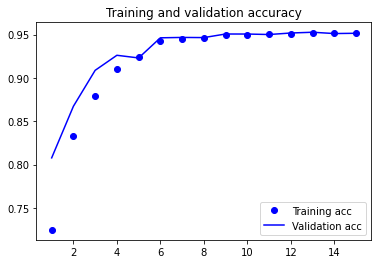

<Figure size 432x288 with 0 Axes>

In [26]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

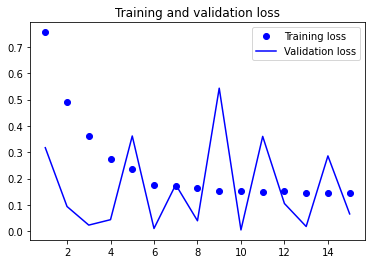

In [27]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Testing the model

In [28]:
test_generator = test_datagen.flow_from_directory(
oct_test_path,
#target_size=(150, 150),
class_mode='categorical',
shuffle=False)

Found 1000 images belonging to 4 classes.


In [0]:
pred=model.predict_generator(test_generator)

In [0]:
predictions=[]
for p in pred:
    predictions.append(np.argmax(p))

In [31]:
# Accuracy score
print("Accuracy Score -> ",accuracy_score(predictions,test_generator.labels)*100)

Accuracy Score ->  92.60000000000001


In [32]:
# Classification report
print(classification_report(test_generator.labels, predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       250
           1       1.00      0.94      0.97       250
           2       0.99      0.76      0.86       250
           3       0.98      1.00      0.99       250

    accuracy                           0.93      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.93      0.93      1000



In [0]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [34]:
multiclass_roc_auc_score(test_generator.labels, predictions)

0.9506666666666668

- Our model is giving an AUC-ROC of 0.95 on the test set, which is pretty good.

## Chest X-Ray Images

In [0]:
xray_train_path=os.path.join(xray_path,'train')
xray_test_path=os.path.join(xray_path,'test')

In [0]:
xray_train_normal=os.path.join(xray_train_path,'NORMAL')
xray_train_pneumonia=os.path.join(xray_train_path,'PNEUMONIA')

In [0]:
print('Total Chest X-Ray train NORMAL images:', len(os.listdir(xray_train_normal)))
print('Total Chest X-Ray train PNEUMONIA images:', len(os.listdir(xray_train_pneumonia)))

Total Chest X-Ray train NORMAL images: 1349
Total Chest X-Ray train PNEUMONIA images: 3884


### Preparing a set of validation images by taking out 25 percent of training images

In [0]:
xray_val_path=os.path.join(xray_path,'val')
os.mkdir(xray_val_path)

In [0]:
xray_val_normal=os.path.join(xray_val_path,'NORMAL')
os.mkdir(xray_val_normal)
xray_val_pneumonia=os.path.join(xray_val_path,'PNEUMONIA')
os.mkdir(xray_val_pneumonia)

- Preparing the respective directories.

In [0]:
copy_files(xray_train_normal,xray_val_normal)
copy_files(xray_train_pneumonia,xray_val_pneumonia)

In [0]:
print('Total Chest X-Ray train NORMAL images:', len(os.listdir(xray_train_normal)))
print('Total Chest X-Ray val NORMAL images:', len(os.listdir(xray_val_normal)))
print('Total Chest X-Ray train PNEUMONIA images:', len(os.listdir(xray_train_pneumonia)))
print('Total Chest X-Ray val PNEUMONIA images:', len(os.listdir(xray_val_pneumonia)))

Total Chest X-Ray train NORMAL images: 1012
Total Chest X-Ray val NORMAL images: 337
Total Chest X-Ray train PNEUMONIA images: 2913
Total Chest X-Ray val PNEUMONIA images: 971


### Training the model

#### Checking the shape of the images

In [0]:
files=os.listdir(xray_val_pneumonia)
img = image.load_img(os.path.join(xray_val_pneumonia,files[1]))
img=image.img_to_array(img)
img.shape

(768, 1232, 3)

#### Building the model

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu' ,input_shape=(256, 256, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_341 (Conv2D)          (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_342 (Conv2D)          (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_144 (MaxPoolin (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_343 (Conv2D)          (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_344 (Conv2D)          (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_145 (MaxPoolin (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_345 (Conv2D)          (None, 59, 59, 128)     

In [0]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(0.0001),
metrics=['acc'])

In [0]:
train_generator = train_datagen.flow_from_directory(
xray_train_path,
#target_size=(150, 150),
batch_size=64,
class_mode='binary',
shuffle=True)

Found 3924 images belonging to 2 classes.


In [0]:
validation_generator = train_datagen.flow_from_directory(
xray_val_path,
#target_size=(150, 150),
batch_size=64,
class_mode='binary',
shuffle=True)

Found 1308 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
train_generator,
steps_per_epoch=62,
epochs=16,
validation_data=validation_generator,
validation_steps=21,
callbacks=[earlystopper, reduce_lr])

Epoch 1/16
62/62 [==============================] - 135s 2s/step - loss: 0.5852 - acc: 0.7342 - val_loss: 0.5185 - val_acc: 0.7424
Epoch 2/16
62/62 [==============================] - 119s 2s/step - loss: 0.4867 - acc: 0.7610 - val_loss: 1.2196 - val_acc: 0.7813
Epoch 3/16
62/62 [==============================] - 118s 2s/step - loss: 0.4016 - acc: 0.8084 - val_loss: 0.4435 - val_acc: 0.7913
Epoch 4/16
62/62 [==============================] - 119s 2s/step - loss: 0.3679 - acc: 0.8275 - val_loss: 0.3840 - val_acc: 0.8394
Epoch 5/16
62/62 [==============================] - 119s 2s/step - loss: 0.3191 - acc: 0.8512 - val_loss: 0.3799 - val_acc: 0.8670
Epoch 6/16
62/62 [==============================] - 118s 2s/step - loss: 0.3221 - acc: 0.8568 - val_loss: 0.1624 - val_acc: 0.8540
Epoch 7/16
62/62 [==============================] - 118s 2s/step - loss: 0.3077 - acc: 0.8570 - val_loss: 0.3414 - val_acc: 0.8930
Epoch 8/16
62/62 [==============================] - 119s 2s/step - loss: 0.3123 - a

In [0]:
model.save('chest_xray.h5')
#model=models.load_model('/content/drive/My Drive/chest_xray.h5')

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

<Figure size 432x288 with 0 Axes>

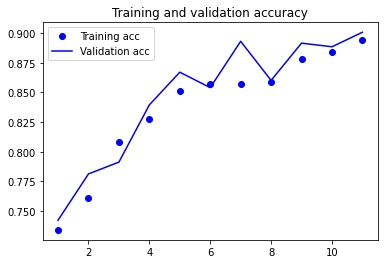

<Figure size 432x288 with 0 Axes>

In [0]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

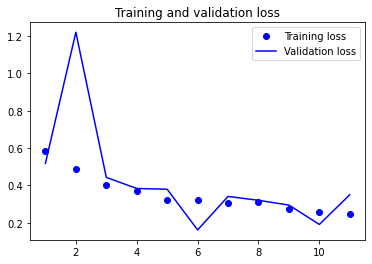

In [0]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Testing the model

In [0]:
test_generator = test_datagen.flow_from_directory(
xray_test_path,
#target_size=(150, 150),
class_mode='binary',
shuffle=False)

Found 624 images belonging to 2 classes.


In [0]:
pred=model.predict_generator(test_generator)

In [0]:
predictions=[]
for p in pred:
    if p>0.5:
        predictions.append(1)
    else:
        predictions.append(0)

In [0]:
# Accuracy score
print("Accuracy Score -> ",accuracy_score(predictions,test_generator.labels)*100)

Accuracy Score ->  84.4551282051282


In [0]:
# Classification report
print(classification_report(test_generator.labels, predictions))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       234
           1       0.89      0.86      0.87       390

    accuracy                           0.84       624
   macro avg       0.83      0.84      0.84       624
weighted avg       0.85      0.84      0.85       624



In [0]:
multiclass_roc_auc_score(test_generator.labels, predictions)

0.8397435897435898

- Our model is giving an AUC-ROC of 0.839 on the test set,which is pretty good considering such less number of training images.